In [2]:
# Importar bibliotecas necessárias
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# 1. Realizar upload da imagem
filename = 'Images\Mao.jpg'
image = cv2.imread(filename)

In [6]:
# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
    exit()

In [4]:
# Converter a imagem de BGR (OpenCV) para RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

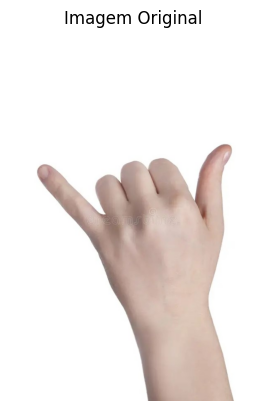

In [5]:
# Exibir a imagem original
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')
plt.show()


In [7]:
# 2. Mudar o espaço de cor para YCrCb (espaço de cor comum para detecção de pele)
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

In [14]:
# 3. Definir limiares para detecção de pele em YCrCb
# Esses valores podem ser ajustados conforme necessário
lower_skin = np.array([0, 135, 85], dtype=np.uint8)
upper_skin = np.array([255, 180, 135], dtype=np.uint8)

In [15]:
# Criar uma máscara para a pele
skin_mask = cv2.inRange(image_ycrcb, lower_skin, upper_skin)

# Aplicar a máscara na imagem original
skin_detected = cv2.bitwise_and(image_rgb, image_rgb, mask=skin_mask)

# Exibir a máscara e a imagem com a pele detectada
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

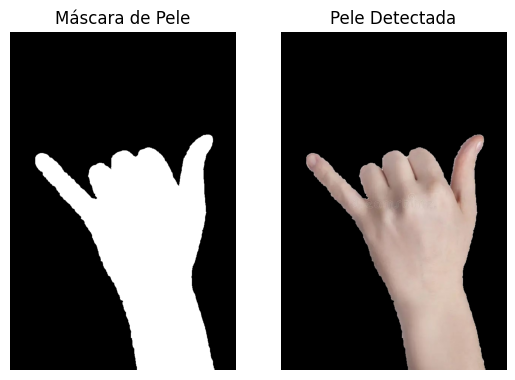

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(skin_mask, cmap='gray')
plt.title('Máscara de Pele')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skin_detected)
plt.title('Pele Detectada')
plt.axis('off')

plt.show()

In [17]:
# 4. Verificar se a pele foi detectada
if np.any(skin_mask):
    print("Pele detectada na imagem.")
else:
    print("Nenhuma pele detectada na imagem.")

Pele detectada na imagem.


In [18]:
# 5. Recortar a região de interesse (ROI) e salvar a imagem
# Encontrar os contornos na máscara
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
# Desenhar os contornos na imagem original
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

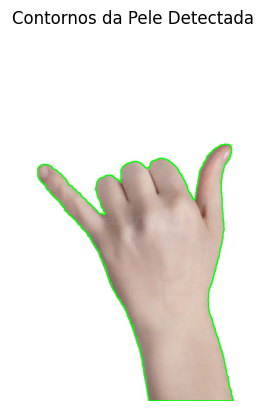

In [20]:
# Exibir a imagem com os contornos
plt.imshow(image_with_contours)
plt.title('Contornos da Pele Detectada')
plt.axis('off')
plt.show()

In [21]:
# Salvar a imagem com a pele detectada
cv2.imwrite('skin_detected.jpg', cv2.cvtColor(skin_detected, cv2.COLOR_RGB2BGR))
print("Imagem com pele detectada salva como 'skin_detected.jpg'.")

Imagem com pele detectada salva como 'skin_detected.jpg'.


In [22]:
# Salvar a imagem com os contornos
cv2.imwrite('skin_contours.jpg', cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))
print("Imagem com contornos salva como 'skin_contours.jpg'.")

Imagem com contornos salva como 'skin_contours.jpg'.
